### Basic examples of call/use of *GISCO* web-services...

Let us run a very simple example using the [**`happyGISCO`**](https://github.com/eurostat/happyGISCO) module. One can refer anytime to the documentation available at this address:  http://happygisco.readthedocs.io.

In [1]:
import happygisco
from happygisco import settings, base, services
from happygisco import happyType

! missing FASTENERS package (https://pypi.org/project/fasteners/) <class 'ImportWarning'> !
! missing SIMPLEJSON package (https://pypi.python.org/pypi/simplejson/) <class 'ImportWarning'> !
! missing GOOGLEPLACES package (https://github.com/slimkrazy/python-google-places) !


In this notebook, we will also show how the various services can be combined with other useful `Python` modules, _e.g._ [**`gdal`**](https://gdal.org/python/), [**`geopandas`**](https://geopandas.readthedocs.io/en/latest), [**`ipyleaflet`**](https://ipyleaflet.readthedocs.io/en/latest/) or [**`folium`**](https://github.com/python-visualization/folium):

In [2]:
try:
    import geopandas
    import folium
    import ipyleaflet
except:
    print('!ups...some useful modules are missing!')

We first create an instance of a `GISCO`-based service, namely using the [**`services.GISCOService`**](https://happygisco.readthedocs.io/en/latest/services.html#services.GISCOService) class.

In [3]:
serv = services.GISCOService()

In the following, we will use this instance to perform various operations, calling everytim *GISCO* web-services. 

Let us simply define a geolocation by its common name:

In [4]:
whereamI = 'Luxembourg'

We could also have chosen to actually use: `wheramI = "Luxembourg, Luxembourg"`. That is up to us actually...and to the service capability to resolve toponame ambibuity.

One can already simply run the service to retrieve the geographical coordinates of the considered location, since the method [**`GISCOService.place2coord`**](https://happygisco.readthedocs.io/en/latest/services.html#services.GISCOService.place2coord) can be used for that purpose:

In [5]:
coords = serv.place2coord(whereamI)
coords

[[49.8158683, 6.1296751],
 [49.6047585, 6.142580146666669],
 [48.3777152, 4.2576617],
 [49.6112768, 6.129799]]

Hence, we got this way all the geolocations that *"potentially"* correspond to the name `whereamI`. We can actually decide to retrieve one location instead of all of them, *e.g.* the first one in the list (rather arbitrarly):

In [6]:
coord = serv.place2coord(whereamI, unique=True)
coord

[49.8158683, 6.1296751]

Note that any time, we actually call the *GISCO* geoservice... there is **no caching** of the data fetched through the service (instead, loaded data may be cached)!

What if we *"revert"* the geocoding service to identify the name of the location, using the [**`GISCOService.coord2place`**](https://happygisco.readthedocs.io/en/latest/services.html#services.GISCOService.coord2place) method for that purpose:

In [7]:
serv.coord2place(coord)

'Schieren, 7421, Luxembourg'

Hence, it does not exactly correspond to the input location name... not so surprising. What if we run the same service on the whole collection of all retrieved geographical coordinates:

In [8]:
names = serv.coord2place(coords)
names

['Schieren, 7421, Luxembourg',
 "Rue d'Itzig, Luxembourg, 1118, Luxembourg",
 "Rue de l'Église, Bouy-Luxembourg, (Grand Est), 10220, France",
 'Luxembourg, 2525, Luxembourg']

Hum... note that one of the places retrieved is actually...in France. That's the ambiguity related to the toponame. Note that this issue is actually not solved when passing the country as well (but that is specific to...Luxembourg):

In [9]:
serv.coord2place(serv.place2coord('%s, Luxembourg' % whereamI))

['Schieren, 7421, Luxembourg',
 "Rue d'Itzig, Luxembourg, 1118, Luxembourg",
 "Rue de l'Église, Bouy-Luxembourg, (Grand Est), 10220, France",
 'Luxembourg, 2525, Luxembourg']

Note that we can run the service again to retrieve the actual `(Lon,lat)` locations (instead of `(lat,Lon,)`) of the toponames above:

In [10]:
serv.place2coord(names, order='Ll', unique=True)

[[6.1239744, 49.8198198],
 [6.1499308, 49.5980238],
 [4.2574905, 48.3761178],
 [6.125268, 49.6180953]]

You could instead use the module `geopandas` when this is available on your local install. The module `geopandas` is actually based on the [**`geopy`**](http://geopy.readthedocs.io/) module (see this [page](https://geopandas.readthedocs.io/en/latest/geocoding.html)), itself available in **`happyGISCO`** through the [**`services.APIService`**](https://happygisco.readthedocs.io/en/latest/services.html#services.APIService) class. Run for instance the following and compare it with the previous output:

In [11]:
geopandas.tools.geocode(names, provider="nominatim")

,address,geometry
0,"Schieren, Canton Diekirch, Lëtzebuerg",POINT (6.096622 49.8300396)
1,"Rue d'Itzig, Bonnevoie, Luxembourg, Canton Lux...",POINT (6.1499308 49.5980238)
2,"Rue de l'Église, Bouy-Luxembourg, Troyes, Aube...",POINT (4.2574905 48.3761178)
3,"Luxembourg, Canton Luxembourg, Lëtzebuerg",POINT (6.129799 49.6112768)


The method [**`GISCOService.coordconvert`**](https://happygisco.readthedocs.io/en/latest/services.html#services.GISCOService.coordconvert) will enable you to transform geographical coordinates from/to any space reference system supported by _GISCO_ web-services  (_e.g._, see the global variable [**`settings.GISCO_PROJECTIONS`**](https://happygisco.readthedocs.io/en/latest/settings.html#settings.GISCO_PROJECTIONS)). For instance, if you want to reproject the coordinates above from the default space reference system (EPSG:4326 WGS 84) to LAEA Europe (EPSG:3035 ETRS89), you can simply launch (to retrieve the same results from another service, try for instance this: https://epsg.io/transform#s_srs=4326&t_srs=3035&x=6.1239744&y=49.8198198 in your browser):

In [12]:
serv.coordconvert(coords, iproj=4326, oproj='laea')

[[8923061.89975081, -655106.0394909112],
 [8900211.752797497, -665301.3787303092],
 [8817004.98420731, -921120.6734631523],
 [8901254.74980187, -666237.1182139819]]

You may also be interested in getting the route. The method [**`GISCOService.coord2route`**](https://happygisco.readthedocs.io/en/latest/services.html#services.GISCOService.coord2route) (or its counterpart [**`GISCOService.place2route`**](https://happygisco.readthedocs.io/en/latest/services.html#services.GISCOService.place2route)) will run _GISCO_ routing service for you:

In [13]:
serv.coord2route([coords[0],coords[2]])

({'distance': 5001441.9,
  'duration': 422894.6,
  'geometry': 'wnodHy|fxG{ym@fp}AquWlwvD{_a@|dl@icP~drDbe~A~g_LhfGjgwEw~]bnl@`rJdqx@c|u@h|qAjio@xaqDqvaDnhzErhWbqcF{xoB|kyFavNvykGkscArmrAyxg@tfoBxhIbmlCoor@tv~Fpx`@xfxHygGt_wAu`y@pliCdsAli_Ghbc@nzzBjqwApyxB{\\do_ChpWvotAmqK|vpFoxe@h}pAfoWhc|MqxQr`Oqwa@z_rEnjz@n{d@p~iAbcyC~|@`zfBftx@hed@bug@jqzAbk|AucS`t|Bx|tAjfdDr`l@hoRfhoBhbt@axm@hr}@laFxm_Avx~Eb_|@~zq@wm]lu}A`~BrtsAh`~@xfzEt|sEjapDr|nCjoOlxz@yltBhqaCc|t@ll{DgwsCdgnAwfbFtvwBc{|B`{q@}}jDx~|B{v~Ab~Hcts@rezByjIxpa@fhd@td\\se^xxv@|x[pgkAhvtBdfmC~zbBefUd{vC`_x@h`jCrf}ItqsD',
  'legs': [{'distance': 5001441.9,
    'duration': 422894.6,
    'steps': [],
    'summary': ''}]},
 [{'hint': 'djQ-grvYuYQ80UoAAAAAAJMAAABMAQAAB7EAAHl0egFScQAApR6_AtnJ3QI8IfgCcy_iAgYAAQEZfn5e',
   'location': [46.079653, 48.089561],
   'name': 'Астрахань — Волгоград'},
  {'hint': '6wdFhO8HRYQAAAAAAAAAAJQAAAB_AAAApQAAAK3WeAJScQAAO1nAAO6aHQILiF0AffdAAAEAAQEZfn5e',
   'location': [12.605755, 35.494638],
   'name': ''}])

We can exploit the outputs of the *GISCO* service, `names` and `coords` data, for visualisation. For that purpose, the module `folium`, that actually builds ontop of [**`Leaflet.js`**](https://leafletjs.com) can be used. To render the map in the notebook, we call the *"blue marble"* tiles (one of the [background view services](https://webgate.ec.europa.eu/fpfis/wikis/display/GISCO/Geospatial+information+services+for+the+European+Commission+and+other+EU+users) of *GISCO*) as background. Note the use of the [**`GISCOService.tile_info`**](https://happygisco.readthedocs.io/en/latest/services.html#services.GISCOService.tile_info) method for defining the background tile service (_i.e._, URL, attribution, _etc..._ see global variable [**`settings.GISCO_TILES`**](https://happygisco.readthedocs.io/en/latest/settings.html#settings.GISCO_TILES) for a list of available tiles). 

In [14]:
tiles = serv.tile_info(tile='bmarble')
map_display = folium.Map(location=coord, tiles=tiles['url'], attr=tiles['attr'], zoom_start=5)
[folium.Marker(coords[i], popup=folium.Popup('%s' % names[i], parse_html=True)).add_to(map_display) \
     for i in range(len(names))]
map_display

Now you can zoom in/out on the map, check the location designatd by the marker....

We can further use the *GISCO* service to retrieve the *geometry* associated to the location, using the [**`GISCOService.place2geom`**](https://happygisco.readthedocs.io/en/latest/services.html#services.GISCOService.place2geom)  (or its counterpart [**`GISCOService.coord2geom`**](https://happygisco.readthedocs.io/en/latest/services.html#services.GISCOService.coord2geom)) method for that purpose:

In [15]:
serv.place2geom(whereamI)

[{'geometry': {'coordinates': [6.1296751, 49.8158683], 'type': 'Point'},
  'properties': {'country': 'Luxembourg',
   'extent': [5.7357006, 50.1827724, 6.5312481, 49.4478539],
   'name': 'Luxembourg',
   'osm_id': 2171347,
   'osm_key': 'place',
   'osm_type': 'R',
   'osm_value': 'country'},
  'type': 'Feature'},
 {'geometry': {'coordinates': [5.439918625407589, 49.963667], 'type': 'Point'},
  'properties': {'country': 'Belgium',
   'extent': [4.9684415, 50.430377, 6.0344254, 49.4969821],
   'name': 'Luxembourg',
   'osm_id': 1412581,
   'osm_key': 'boundary',
   'osm_type': 'R',
   'osm_value': 'administrative',
   'state': 'Wallonia'},
  'type': 'Feature'},
 {'geometry': {'coordinates': [6.142580146666669, 49.6047585],
   'type': 'Point'},
  'properties': {'country': 'Luxembourg',
   'extent': [5.998434, 49.692307, 6.3096867, 49.516975],
   'name': 'Canton Luxembourg',
   'osm_id': 407824,
   'osm_key': 'place',
   'osm_type': 'R',
   'osm_value': 'county'},
  'type': 'Feature'},
 {

or we are lazy:

In [16]:
serv.place2geom(whereamI, unique=True)

{'geometry': {'coordinates': [6.1296751, 49.8158683], 'type': 'Point'},
 'properties': {'country': 'Luxembourg',
  'extent': [5.7357006, 50.1827724, 6.5312481, 49.4478539],
  'name': 'Luxembourg',
  'osm_id': 2171347,
  'osm_key': 'place',
  'osm_type': 'R',
  'osm_value': 'country'},
 'type': 'Feature'}

We are more interested in retrieving/identifying the NUTS value, say at level 2, associated to the geolocation. We can use the [**`GISCOService.place2nuts`**](https://happygisco.readthedocs.io/en/latest/services.html#services.GISCOService.place2nuts) method for that purpose:

In [17]:
serv.place2nuts(whereamI, level=2)

{'attributes': {'CNTR_CODE': 'LU',
  'LEVL_CODE': '2',
  'NAME_LATN': 'Luxembourg',
  'NUTS_ID': 'LU00',
  'NUTS_NAME': 'Luxembourg',
  'OBJECTID': '1697',
  'SHRT_ENGL': 'Luxembourg'},
 'displayFieldName': 'NUTS_ID',
 'layerId': 3,
 'layerName': 'NUTS_2016',
 'value': 'LU00'}

or if we are actually interested in retrieving all the NUTS levels (from 0 to 3):

In [18]:
serv.place2nuts(whereamI)

[{'attributes': {'CNTR_CODE': 'LU',
   'LEVL_CODE': '3',
   'NAME_LATN': 'Luxembourg',
   'NUTS_ID': 'LU000',
   'NUTS_NAME': 'Luxembourg',
   'OBJECTID': '323',
   'SHRT_ENGL': 'Luxembourg'},
  'displayFieldName': 'NUTS_ID',
  'layerId': 3,
  'layerName': 'NUTS_2016',
  'value': 'LU000'},
 {'attributes': {'CNTR_CODE': 'LU',
   'LEVL_CODE': '2',
   'NAME_LATN': 'Luxembourg',
   'NUTS_ID': 'LU00',
   'NUTS_NAME': 'Luxembourg',
   'OBJECTID': '1697',
   'SHRT_ENGL': 'Luxembourg'},
  'displayFieldName': 'NUTS_ID',
  'layerId': 3,
  'layerName': 'NUTS_2016',
  'value': 'LU00'},
 {'attributes': {'CNTR_CODE': 'LU',
   'LEVL_CODE': '1',
   'NAME_LATN': 'LUXEMBOURG',
   'NUTS_ID': 'LU0',
   'NUTS_NAME': 'LUXEMBOURG',
   'OBJECTID': '1925',
   'SHRT_ENGL': 'Luxembourg'},
  'displayFieldName': 'NUTS_ID',
  'layerId': 3,
  'layerName': 'NUTS_2016',
  'value': 'LU0'},
 {'attributes': {'CNTR_CODE': 'LU',
   'LEVL_CODE': '0',
   'NAME_LATN': 'LUXEMBOURG',
   'NUTS_ID': 'LU',
   'NUTS_NAME': 'LUXEMBO

Similarly, we could have run the service on the already computed geographical coordinates using the [**`GISCOService.coord2nuts`**](https://happygisco.readthedocs.io/en/latest/services.html#services.GISCOService.coord2nuts) method:

In [19]:
serv.coord2nuts(coord, level=2)

{'attributes': {'CNTR_CODE': 'LU',
  'LEVL_CODE': '2',
  'NAME_LATN': 'Luxembourg',
  'NUTS_ID': 'LU00',
  'NUTS_NAME': 'Luxembourg',
  'OBJECTID': '1697',
  'SHRT_ENGL': 'Luxembourg'},
 'displayFieldName': 'NUTS_ID',
 'layerId': 3,
 'layerName': 'NUTS_2016',
 'value': 'LU00'}

Investing more into NUTS, let's use some of the other available services, for instance the [**`GISCOService.nuts_info`**](https://happygisco.readthedocs.io/en/latest/services.html#services.GISCOService.nuts_info) to retrieve the NUTS areas for a given county:

In [20]:
serv.nuts_info(info='UNITS', unit='AT')

['AT',
 'AT1',
 'AT11',
 'AT111',
 'AT112',
 'AT113',
 'AT12',
 'AT121',
 'AT122',
 'AT123',
 'AT124',
 'AT125',
 'AT126',
 'AT127',
 'AT13',
 'AT130',
 'AT2',
 'AT21',
 'AT211',
 'AT212',
 'AT213',
 'AT22',
 'AT221',
 'AT222',
 'AT223',
 'AT224',
 'AT225',
 'AT226',
 'AT3',
 'AT31',
 'AT311',
 'AT312',
 'AT313',
 'AT314',
 'AT315',
 'AT32',
 'AT321',
 'AT322',
 'AT323',
 'AT33',
 'AT331',
 'AT332',
 'AT333',
 'AT334',
 'AT335',
 'AT34',
 'AT341',
 'AT342']

but also restricting the search for any given level or year (see global variables [**`settings.GISCO_LEVELS`**](https://happygisco.readthedocs.io/en/latest/settings.html#settings.GISCO_LEVELS) and [**`settings.GISCO_YEARS`**](https://happygisco.readthedocs.io/en/latest/settings.html#settings.GISCO_YEARS) for available levels and years):

In [21]:
serv.nuts_info(info='UNITS', unit='AT', year=2013, level=2)

['AT11', 'AT12', 'AT13', 'AT21', 'AT22', 'AT31', 'AT32', 'AT33', 'AT34']

Note how you can get more information regarding the names of the NUTS regions, for instance:

In [22]:
serv.nuts_info(info='NAMES', unit='AT', year=2013, level=2)

,CNTR_CODE,NUTS_ID,NUTS_NAME
1,AT,AT11,Burgenland (AT)
5,AT,AT12,Niederösterreich
13,AT,AT13,Wien
16,AT,AT21,Kärnten
25,AT,AT31,Oberösterreich
30,AT,AT32,Salzburg
34,AT,AT33,Tirol
39,AT,AT34,Vorarlberg
1703,AT,AT22,Steiermark


The method [**`GISCOService.nutsid2name`**](https://happygisco.readthedocs.io/en/latest/services.html#services.GISCOService.nutsid2name) can then be used to retrieve the names of NUTS defined through their ID:

In [23]:
serv.nutsid2name(id=['AT11', 'BE100', 'JP1', 'DK01'])

['Burgenland',
 'Arr. de Bruxelles-Capitale/Arr. van Brussel-Hoofdstad',
 None,
 'Hovedstaden']

In [24]:
serv.nutsid2name(name=['ЦРНА ГОРА', 'Ile-de-France'])

[['ME00', 'ME000', 'ME', 'ME0'], ['FR10', 'FR1']]

In [25]:
units = serv.nutsid2name(name='France', dist='contains')
print(units)
serv.nutsid2name(id=units)

['FR10', 'FR1', 'FR']


['Ile-de-France', 'ILE-DE-FRANCE', 'FRANCE']

You can also get information regarding the country datasets available on _GISCO_ servers using the [**`GISCOService.country_info`**](https://happygisco.readthedocs.io/en/latest/services.html#services.GISCOService.country_info) method:

In [26]:
f = serv.country_info(info = 'FILES', year=2016)
f['AT']

['AT-region-01m-3035-2016.geojson',
 'AT-region-01m-3857-2016.geojson',
 'AT-region-01m-4258-2016.geojson',
 'AT-region-01m-4326-2016.geojson',
 'AT-region-03m-3035-2016.geojson',
 'AT-region-03m-3857-2016.geojson',
 'AT-region-03m-4258-2016.geojson',
 'AT-region-03m-4326-2016.geojson',
 'AT-region-10m-3035-2016.geojson',
 'AT-region-10m-3857-2016.geojson',
 'AT-region-10m-4258-2016.geojson',
 'AT-region-10m-4326-2016.geojson',
 'AT-region-20m-3035-2016.geojson',
 'AT-region-20m-3857-2016.geojson',
 'AT-region-20m-4258-2016.geojson',
 'AT-region-20m-4326-2016.geojson',
 'AT-region-60m-3035-2016.geojson',
 'AT-region-60m-3857-2016.geojson',
 'AT-region-60m-4258-2016.geojson',
 'AT-region-60m-4326-2016.geojson',
 'AT-label-3035-2016.geojson',
 'AT-label-3857-2016.geojson',
 'AT-label-4258-2016.geojson',
 'AT-label-4326-2016.geojson']

Note how the method [**`GISCOService.url2dimension`**](https://happygisco.readthedocs.io/en/latest/services.html#services.GISCOService.url2dimension) can be used to automatically identify the parameters associated to each of these files:

In [27]:
fil = f['AT'][0]
print('data considered: %s' % fil)
serv.url2dimension(fil, domain='gisco')

data considered: AT-region-01m-3035-2016.geojson


OrderedDict([('source', 'AT'),
             ('year', 2016),
             ('proj', 3035),
             ('scale', '01m'),
             ('vector', 'RG'),
             ('level', 0),
             ('ifmt', 'geojson')])

It is possible to return the geometry stored in any of the vector files above, _e.g._ using the [**`GISCOService.country_geometry`**](https://happygisco.readthedocs.io/en/latest/services.html#services.GISCOService.country_geometry). Note that the output geometry is actually defined as a nested dictionary structure (_i.e._ an instance of the [**`base._NestedDict`**](https://happygisco.readthedocs.io/en/latest/base.html#base._NestedDict) class):

In [28]:
geom = serv.country_geometry(code='AT', scale='10m', proj='longlat', year=2016, vector='region')
print('object type: %s' % type(geom))
print('main parameters: %s' % geom.dimensions)
geom

object type: <class 'happygisco.base._NestedDict'>
main parameters: OrderedDict([('source', 'AT'), ('year', 2016), ('proj', 4258), ('scale', '10m'), ('vector', 'RG'), ('ifmt', 'geojson')])


{'AT': {2016: {4258: {'10m': {'RG': {'geojson': {'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::4258'}}, 'type': 'FeatureCollection', 'features': [{'geometry': {'type': 'Polygon', 'coordinates': [[[16.94028, 48.61725], [16.94978, 48.53579], [16.85111, 48.43864], [16.85557, 48.35287], [16.94619, 48.26142], [16.9762, 48.17224], [17.06674, 48.11868], [17.07721, 48.03778], [17.1608, 48.00666], [17.10875, 47.97548], [17.09478, 47.90293], [17.03372, 47.86002], [17.06316, 47.8113], [17.05736, 47.70774], [16.90584, 47.68908], [16.86123, 47.70983], [16.76995, 47.68283], [16.7103, 47.73341], [16.60462, 47.7561], [16.42154, 47.6653], [16.65454, 47.61125], [16.70245, 47.53945], [16.64622, 47.4466], [16.47151, 47.40072], [16.43376, 47.35292], [16.48128, 47.28522], [16.43588, 47.1939], [16.51936, 47.13372], [16.47441, 47.09291], [16.49826, 47.06032], [16.47233, 47.00175], [16.29523, 46.99785], [16.11385, 46.86907], [15.99624, 46.8354], [16.00843, 46.68129], [15.78642, 46.70747

or if we just want to retrieve the label (note how the scale parameter is ignored):

In [29]:
geom = serv.country_geometry(code='AT', scale='60m', proj='longlat', year=2016, vector='LB')
print('main parameters: %s' % geom.dimensions)
geom

main parameters: OrderedDict([('source', 'AT'), ('year', 2016), ('proj', 4258), ('vector', 'LB'), ('ifmt', 'geojson')])


{'AT': {2016: {4258: {'LB': {'geojson': {'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::4258'}}, 'type': 'FeatureCollection', 'features': [{'geometry': {'type': 'Point', 'coordinates': [14.1373, 47.5847]}, 'type': 'Feature', 'properties': {'CNTR_ID': 'AT', 'ISO3_CODE': 'AUT', 'CNTR_NAME': 'Österreich', 'NAME_ENGL': 'Austria', 'FID': 'AT'}, 'id': 'AT'}]}}}}}}

It is possible to fetch the responses from _GISCO_ API associated to any NUTS area. The method [**`GISCOService.nuts_response`**](https://happygisco.readthedocs.io/en/latest/services.html#services.GISCOService.nuts_response) can be used for that purpose, but you will still need to define some additional parameters regarding the retrieved data (see global variables [**`settings.GISCO_SCALES`**](https://happygisco.readthedocs.io/en/latest/settings.html#settings.GISCO_SCALES) and [**`settings.GISCO_VECTORS`**](https://happygisco.readthedocs.io/en/latest/settings.html#settings.GISCO_VECTORS) for available scales and vectors):

In [30]:
units = serv.nuts_info(info='UNITS', unit='AT', level=2, year=2013)
resp = serv.nuts_response(unit=units, year=2013, scale='20m', vector='region')
print('object type: %s' % type(resp))
print('main parameters: %s' % resp.dimensions)
print('link to GISCO dataset %s' % resp.url)
resp

object type: <class 'happygisco.base._NestedDict'>
main parameters: OrderedDict([('source', ['AT11', 'AT12', 'AT13', 'AT21', 'AT22', 'AT31', 'AT32', 'AT33', 'AT34']), ('year', 2013), ('proj', 4326), ('scale', '20m'), ('vector', 'RG'), ('ifmt', 'geojson')])
link to GISCO dataset {'AT11': {2013: {4326: {'20m': {'RG': {'geojson': 'https://ec.europa.eu/eurostat/cache/GISCO/distribution/v2/nuts/distribution/AT11-region-20m-4326-2013.geojson'}}}}}, 'AT12': {2013: {4326: {'20m': {'RG': {'geojson': 'https://ec.europa.eu/eurostat/cache/GISCO/distribution/v2/nuts/distribution/AT12-region-20m-4326-2013.geojson'}}}}}, 'AT13': {2013: {4326: {'20m': {'RG': {'geojson': 'https://ec.europa.eu/eurostat/cache/GISCO/distribution/v2/nuts/distribution/AT13-region-20m-4326-2013.geojson'}}}}}, 'AT21': {2013: {4326: {'20m': {'RG': {'geojson': 'https://ec.europa.eu/eurostat/cache/GISCO/distribution/v2/nuts/distribution/AT21-region-20m-4326-2013.geojson'}}}}}, 'AT22': {2013: {4326: {'20m': {'RG': {'geojson': 'ht

{'AT11': {2013: {4326: {'20m': {'RG': {'geojson': <Response [200]>}}}}}, 'AT12': {2013: {4326: {'20m': {'RG': {'geojson': <Response [200]>}}}}}, 'AT13': {2013: {4326: {'20m': {'RG': {'geojson': <Response [200]>}}}}}, 'AT21': {2013: {4326: {'20m': {'RG': {'geojson': <Response [200]>}}}}}, 'AT22': {2013: {4326: {'20m': {'RG': {'geojson': <Response [200]>}}}}}, 'AT31': {2013: {4326: {'20m': {'RG': {'geojson': <Response [200]>}}}}}, 'AT32': {2013: {4326: {'20m': {'RG': {'geojson': <Response [200]>}}}}}, 'AT33': {2013: {4326: {'20m': {'RG': {'geojson': <Response [200]>}}}}}, 'AT34': {2013: {4326: {'20m': {'RG': {'geojson': <Response [200]>}}}}}}

From this response, we can easily retrieve the data themselves using the [**`GISCOService.nuts_geometry`**](https://happygisco.readthedocs.io/en/latest/services.html#services.GISCOService.nuts_geometry) method. The output will be again stored in a nested dictionary structure:

In [31]:
data = serv.nuts_geometry(resp=resp)
print(type(data))
data.dimensions

<class 'happygisco.base._NestedDict'>


OrderedDict([('source',
              ['AT12',
               'AT13',
               'AT31',
               'AT11',
               'AT33',
               'AT21',
               'AT22',
               'AT32',
               'AT34']),
             ('year', 2013),
             ('proj', 4326),
             ('scale', '20m'),
             ('vector', 'RG'),
             ('ifmt', 'geojson')])

which could actually be run directly using a command similar to that use for fetching the response:

In [32]:
data == serv.nuts_geometry(unit=units, year=2013, scale='20m', vector='region')

True

Geometries can be accessed through the indexing of the nested dictionary, for instance:

In [33]:
data.xvalues(source='AT13')

{'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}, 'type': 'name'},
 'features': [{'geometry': {'coordinates': [[[16.57699, 48.14444],
      [16.2181, 48.12807],
      [16.1819, 48.17103],
      [16.20516, 48.26206],
      [16.43804, 48.31627],
      [16.54698, 48.263],
      [16.53638, 48.17461],
      [16.57699, 48.14444]]],
    'type': 'Polygon'},
   'id': 'AT13',
   'properties': {'CNTR_CODE': 'AT',
    'FID': 'AT13',
    'LEVL_CODE': 2,
    'NUTS_ID': 'AT13',
    'NUTS_NAME': 'Wien'},
   'type': 'Feature'}],
 'type': 'FeatureCollection'}

The list of all geometries can be extracted from the dictionary easily:

In [34]:
geometries = data.xvalues(_force_list_=True)
print(data.dimensions)
geometries

OrderedDict([('source', ['AT12', 'AT13', 'AT31', 'AT11', 'AT33', 'AT21', 'AT22', 'AT32', 'AT34']), ('year', 2013), ('proj', 4326), ('scale', '20m'), ('vector', 'RG'), ('ifmt', 'geojson')])


[{'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'},
   'type': 'name'},
  'features': [{'geometry': {'coordinates': [[[17.1608, 48.00666],
       [17.09466, 47.97087],
       [17.08519, 47.87444],
       [17.00995, 47.85834],
       [17.07445, 47.80826],
       [17.09307, 47.70824],
       [16.74903, 47.68142],
       [16.61229, 47.76023],
       [16.42185, 47.6647],
       [16.65208, 47.6229],
       [16.71451, 47.53963],
       [16.64622, 47.4466],
       [16.44546, 47.40721],
       [16.43376, 47.35292],
       [16.48374, 47.2876],
       [16.41949, 47.19492],
       [16.52933, 47.12723],
       [16.46333, 47.09496],
       [16.52057, 47.05618],
       [16.43888, 47.0297],
       [16.50827, 47.00126],
       [16.30226, 46.99843],
       [16.11385, 46.86907],
       [15.99624, 46.8354],
       [16.12172, 46.99067],
       [16.08651, 47.07421],
       [16.11346, 47.16184],
       [16.01516, 47.36713],
       [16.17177, 47.4224],
       [16.28108, 47.45513],
       [16.3725

Let us display the geometries extracted above by using the `ipyleaflet` module this time:

In [35]:
tile_info = serv.tile_info(tile='osmec')
print(tile_info)
map_display = ipyleaflet.Map(center=tile_info['center'], zoom=tile_info['zoom'])
map_display.add_layer(ipyleaflet.TileLayer(url=tile_info['url'], attribution=tile_info['attr']))
[map_display.add_layer(ipyleaflet.GeoJSON(data=g, hover_style={'fillColor': 'red'})) for g in geometries]
map_display

{'center': [50.033333, 10.35], 'zoom': 4, 'url': 'https://europa.eu/webtools/maps/tiles/osm-ec/{z}/{y}/{x}', 'attr': '© OpenStreetMap'}


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

Let's run it with another set of vector data:

In [36]:
units = serv.nuts_info(info='UNITS', unit='FR', level=3, year=2016)
print(units)
data = serv.nuts_geometry(unit=units, year=2016, scale='10m', vector='region')
print(data.dimensions)
geometries = data.xvalues(_force_list_=True)
tile_info = serv.tile_info(tile='cloudless')
print(tile_info)
map_display = ipyleaflet.Map(center=tile_info['center'], zoom=tile_info['zoom'])
map_display.add_layer(ipyleaflet.TileLayer(url=tile_info['url'], attribution=tile_info['attr']))
[map_display.add_layer(ipyleaflet.GeoJSON(data=g, hover_style={'fillColor': 'red'})) for g in geometries]
map_display

['FR101', 'FR102', 'FR103', 'FR104', 'FR105', 'FR106', 'FR107', 'FR108']
OrderedDict([('source', ['FR108', 'FR107', 'FR103', 'FR101', 'FR102', 'FR106', 'FR105', 'FR104']), ('year', 2016), ('proj', 4326), ('scale', '10m'), ('vector', 'RG'), ('ifmt', 'geojson')])
{'center': [50.033333, 10.35], 'zoom': 4, 'url': 'https://europa.eu/webtools/maps/tiles/sentinelcloudless/{z}/{y}/{x}', 'attr': 'Sentinel Cloudless'}


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

To enable "interoperability", the geometries can then be parsed into a `geopandas.GeoDataFrame` structure using the following:

In [37]:
crs = "+init=epsg:%s" % data.dimensions['proj']
features = happyType.seqflatten([g['features'] for g in geometries])
gdf = geopandas.GeoDataFrame.from_features(features, crs=crs)
print(gdf.crs)
gdf.head()

+init=epsg:4326


,CNTR_CODE,FID,LEVL_CODE,NUTS_ID,NUTS_NAME,geometry
0,FR,FR101,3,FR101,Paris,"POLYGON ((2.41657 48.84924, 2.40676 48.82554, ..."
1,FR,FR102,3,FR102,Seine-et-Marne,"POLYGON ((3.48518 48.85191, 3.40762 48.76344, ..."
2,FR,FR103,3,FR103,Yvelines,"POLYGON ((2.20059 48.90868, 2.16646 48.85857, ..."
3,FR,FR104,3,FR104,Essonne,"POLYGON ((2.32072 48.74876, 2.37942 48.7234, 2..."
4,FR,FR105,3,FR105,Hauts-de-Seine,"POLYGON ((2.31989 48.90046, 2.24222 48.86054, ..."


The dataframe structure can be plotted directly:

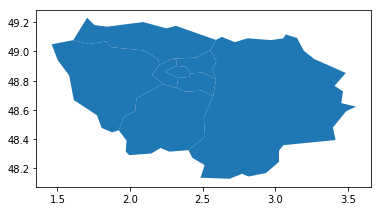

In [38]:
%matplotlib inline
gdf.plot()

Similarly, let's repeat the whole operation when considering all NUTS boundaries over Europe:

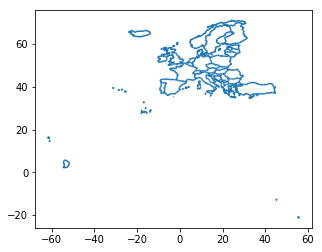

In [39]:
data = serv.nuts_geometry(source='NUTS', year=2016, scale='60m', vector='boundary')
geometries = data.xvalues(_force_list_=True)
crs = "+init=epsg:%s" % data.dimensions['proj']
features = happyType.seqflatten([g['features'] for g in geometries])
gdf = geopandas.GeoDataFrame.from_features(features, crs=crs)
%matplotlib inline
gdf.plot()

Let's project the geometries into a different reference system and replot it: 

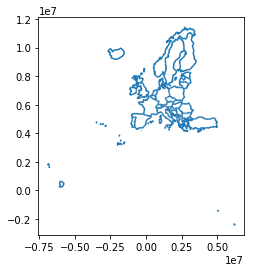

In [40]:
%matplotlib inline
gdf.to_crs({'proj': 'merc'}).plot()

That's is folks!